## 4 digits - Merging year and country wise

### Waves 4,5,6

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv(
    "/Users/alexandralugova/Documents/GitHub/MH-old-workers/data/datasets/results/data_clean_w456.csv"
)
indexes = pd.read_csv(
    "/Users/alexandralugova/Documents/GitHub/MH-old-workers/data/datasets/results/work_quality_indexes_year_country.csv"
)

In [3]:
df = df.merge(indexes, on=["year", "country", "isco"], how="inner")

In [4]:
df

,mergeid,wave,year,age,nb_children,partnerinhh,job_status,eurod,eurodcat,country,...,jqi_working_time_quality,jqi_monthly_earnings_weighted,jqi_skills_discretion_weighted,jqi_social_environment_weighted,jqi_physical_environment_weighted,jqi_intensity_weighted,jqi_prospects_weighted,jqi_working_time_quality_weighted,jqi_sum,jqi_sum_weighted
0,AT-011070-01,4,2011,59.0,2.0,1,Civil servant,2.0,0,Austria,...,82.291667,2018.544145,80.457574,79.867051,97.823588,69.414252,74.732197,86.453532,484.894559,557.454009
1,AT-326780-02,4,2011,57.0,2.0,1,Civil servant,5.0,1,Austria,...,82.291667,2018.544145,80.457574,79.867051,97.823588,69.414252,74.732197,86.453532,484.894559,557.454009
2,AT-413796-01,4,2011,55.0,1.0,1,Civil servant,2.0,0,Austria,...,82.291667,2018.544145,80.457574,79.867051,97.823588,69.414252,74.732197,86.453532,484.894559,557.454009
3,AT-433002-01,4,2011,55.0,1.0,0,Civil servant,6.0,1,Austria,...,82.291667,2018.544145,80.457574,79.867051,97.823588,69.414252,74.732197,86.453532,484.894559,557.454009
4,AT-594803-02,4,2011,57.0,1.0,1,Civil servant,4.0,1,Austria,...,82.291667,2018.544145,80.457574,79.867051,97.823588,69.414252,74.732197,86.453532,484.894559,557.454009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7112,SI-951611-02,6,2015,54.0,2.0,1,Public sector employee,3.0,0,Slovenia,...,96.875000,554.748656,29.678305,24.060877,40.734421,26.460570,34.160156,49.651581,497.492075,226.419489
7113,SI-966058-01,6,2015,57.0,2.0,0,Public sector employee,4.0,1,Slovenia,...,89.389706,659.185057,43.628426,68.433711,61.778573,39.993333,38.737746,63.517250,449.748588,404.636691
7114,SI-974683-01,6,2015,57.0,2.0,1,Public sector employee,1.0,0,Slovenia,...,91.523438,383.575878,18.783260,35.997276,36.763208,25.365239,18.383376,42.851541,313.928054,299.981298
7115,SI-988814-02,6,2015,59.0,3.0,1,Private sector employee,0.0,0,Slovenia,...,94.000000,2026.117064,118.743503,142.708718,138.440094,63.146188,38.473646,149.977384,402.722598,872.435908


In [5]:
df.mergeid.nunique()

4421

In [6]:
df.groupby("country").mergeid.nunique()

country
Austria           236
Belgium           691
Czech Republic    309
Denmark           379
Estonia           522
France            339
Germany           554
Italy             348
Slovenia          273
Spain             535
Switzerland       235
Name: mergeid, dtype: int64

In [7]:
df.groupby("year").mergeid.nunique()

year
2011    2045
2013    2215
2015    2857
Name: mergeid, dtype: int64

In [8]:
df.to_csv(
    "/Users/alexandralugova/Documents/GitHub/MH-old-workers/data/datasets/results/4digits_w456_year_country.csv",
    index=False,
)

### Some descriptive stats

In [9]:
round(df[["age", "gender", "nb_children", "yrseducation"]].describe(), 2)

,age,gender,nb_children,yrseducation
count,7117.00,7117.00,7117.00,7117.00
mean,56.39,0.57,1.78,13.01
std,3.15,0.49,1.26,4.26
min,50.00,0.00,0.00,0.00
25%,54.00,0.00,1.00,11.00
50%,56.00,1.00,2.00,13.00
75%,59.00,1.00,2.00,16.00
max,65.00,1.00,10.00,39.00


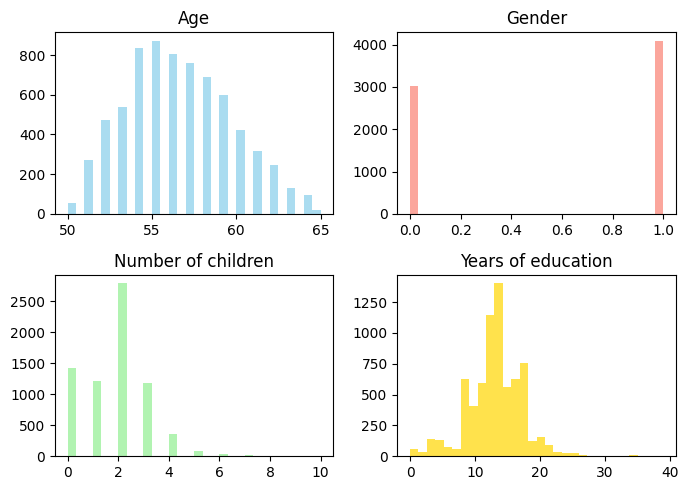

In [10]:
fig, axs = plt.subplots(2, 2, figsize=(7, 5))

axs[0, 0].hist(df["age"], bins=30, color="skyblue", alpha=0.7)
axs[0, 0].set_title("Age")

axs[0, 1].hist(df["gender"], bins=30, color="salmon", alpha=0.7)
axs[0, 1].set_title("Gender")

axs[1, 0].hist(df["nb_children"], bins=30, color="lightgreen", alpha=0.7)
axs[1, 0].set_title("Number of children")

axs[1, 1].hist(df["yrseducation"], bins=30, color="gold", alpha=0.7)
axs[1, 1].set_title("Years of education")

plt.tight_layout()

plt.show()

In [11]:
round(df["job_status"].value_counts(normalize=True), 2)

job_status
Private sector employee    0.39
Public sector employee     0.24
Employee                   0.20
Self-employed              0.11
Civil servant              0.05
Name: proportion, dtype: float64

In [12]:
round(
    df[
        ["yrscontribution", "retirement_age", "work_horizon", "work_horizon_change"]
    ].describe(),
    2,
)

,yrscontribution,retirement_age,work_horizon,work_horizon_change
count,7117.00,7117.00,7117.00,7117.00
mean,35.85,63.33,6.94,0.21
std,6.08,2.17,3.43,0.53
min,6.00,57.00,0.08,0.00
25%,33.00,62.00,4.00,0.00
50%,36.00,65.00,7.00,0.00
75%,40.00,65.00,9.75,0.08
max,55.00,68.00,17.00,4.00


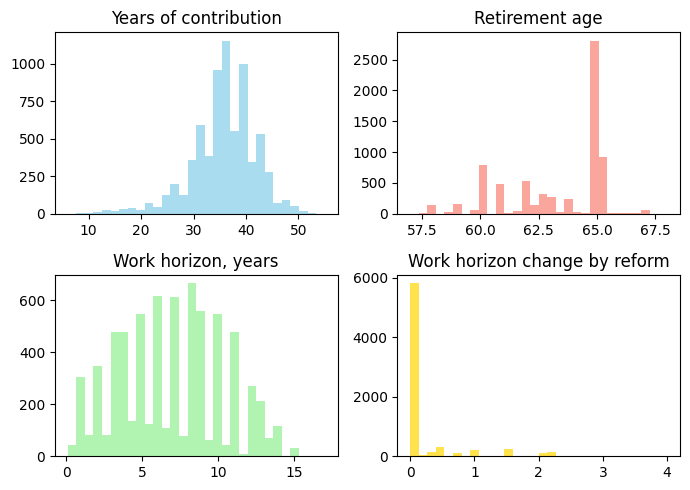

In [13]:
fig, axs = plt.subplots(2, 2, figsize=(7, 5))

axs[0, 0].hist(df["yrscontribution"], bins=30, color="skyblue", alpha=0.7)
axs[0, 0].set_title("Years of contribution")

axs[0, 1].hist(df["retirement_age"], bins=30, color="salmon", alpha=0.7)
axs[0, 1].set_title("Retirement age")

axs[1, 0].hist(df["work_horizon"], bins=30, color="lightgreen", alpha=0.7)
axs[1, 0].set_title("Work horizon, years")

axs[1, 1].hist(df["work_horizon_change"], bins=30, color="gold", alpha=0.7)
axs[1, 1].set_title("Work horizon change by reform")

plt.tight_layout()

plt.show()

In [14]:
round(df["eurodcat"].value_counts(normalize=True), 2)

eurodcat
0    0.8
1    0.2
Name: proportion, dtype: float64

In [15]:
df["eurod"].value_counts()

eurod
0.0     1810
1.0     1726
2.0     1274
3.0      897
4.0      639
5.0      379
6.0      196
7.0      116
8.0       40
9.0       29
10.0       8
11.0       3
Name: count, dtype: int64

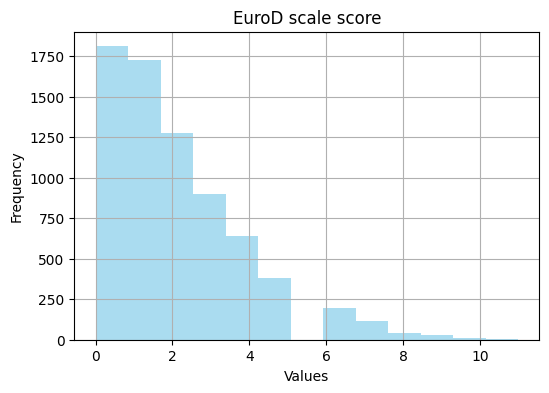

In [16]:
plt.figure(figsize=(6, 4))
plt.hist(df["eurod"], bins=13, color="skyblue", alpha=0.7)
plt.title("EuroD scale score")
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [17]:
round(
    df[
        [
            "jqi_monthly_earnings",
            "jqi_skills_discretion",
            "jqi_social_environment",
            "jqi_physical_environment",
            "jqi_intensity",
            "jqi_prospects",
            "jqi_working_time_quality",
        ]
    ].describe(),
    2,
)

,jqi_monthly_earnings,jqi_skills_discretion,jqi_social_environment,jqi_physical_environment,jqi_intensity,jqi_prospects,jqi_working_time_quality
count,7117.00,7117.00,7117.00,7117.00,7117.00,7117.00,7117.00
mean,1512.87,58.35,79.96,85.16,50.91,58.57,87.61
std,689.73,14.51,7.04,9.26,8.74,13.12,11.01
min,39.50,10.67,40.91,34.62,11.63,0.00,15.62
25%,1066.94,47.35,75.39,79.72,45.35,50.00,82.17
50%,1408.35,57.82,80.21,88.14,51.16,59.46,90.55
75%,1800.18,70.65,84.48,92.04,55.81,66.35,96.09
max,12267.43,93.62,100.00,100.00,88.37,100.00,100.00


### Waves 4,5,6 common individuals

In [18]:
df.mergeid.nunique()

4421

In [19]:
unique_mergeid_w4 = set(df[df.wave == 4]["mergeid"].unique())
unique_mergeid_w5 = set(df[df.wave == 5]["mergeid"].unique())
unique_mergeid_w6 = set(df[df.wave == 6]["mergeid"].unique())
intersection_ids = unique_mergeid_w4.intersection(unique_mergeid_w5).intersection(
    unique_mergeid_w6
)
len(intersection_ids)

724

In [20]:
w456_common = df[df["mergeid"].isin(intersection_ids)].reset_index(drop=True)

isco = w456_common["isco"].value_counts().to_frame().reset_index()
isco = isco[isco["count"] >= 10]
w456_common = w456_common[w456_common["isco"].isin(isco["isco"].unique())].reset_index(
    drop=True
)

In [21]:
w456_common.groupby("country").mergeid.nunique()

country
Austria            55
Belgium           176
Czech Republic     42
Denmark            85
Estonia           108
France            100
Germany            12
Italy              48
Slovenia           43
Spain              55
Name: mergeid, dtype: int64

In [22]:
# Delete Germany as too few individuals
w456_common = w456_common[w456_common.country != "Germany"].reset_index(drop=True)

In [23]:
w456_common.to_csv(
    "/Users/alexandralugova/Documents/GitHub/MH-old-workers/data/datasets/results/4digits_w456_year_country_common.csv",
    index=False,
)

### Waves 4 and 6

In [24]:
result = (
    df[df["year"].isin([2013, 2015])]
    .groupby("mergeid")["work_horizon_change"]
    .sum()
    .reset_index()
)
result["year"] = 2015

df = df.drop(columns="work_horizon_change")
df = df.merge(result, on=["mergeid", "year"], how="left")

df["work_horizon_change"] = df["work_horizon_change"].fillna(0)

In [25]:
w46 = df[(df.wave == 4) | (df.wave == 6)].reset_index(drop=True)

In [26]:
w46.mergeid.nunique()

4058

In [27]:
w46.groupby("country").mergeid.nunique()

country
Austria           232
Belgium           631
Czech Republic    286
Denmark           355
Estonia           504
France            328
Germany           454
Italy             318
Slovenia          255
Spain             460
Switzerland       235
Name: mergeid, dtype: int64

In [28]:
w46.groupby("wave").mergeid.nunique()

wave
4    2045
6    2857
Name: mergeid, dtype: int64

In [29]:
w46.to_csv(
    "/Users/alexandralugova/Documents/GitHub/MH-old-workers/data/datasets/results/4digits_w46_year_country.csv",
    index=False,
)

### Waves 4 and 6 common individuals

In [30]:
unique_mergeid_w4 = set(w46[w46.wave == 4]["mergeid"].unique())
unique_mergeid_w6 = set(w46[w46.wave == 6]["mergeid"].unique())
intersection_ids = unique_mergeid_w4.intersection(unique_mergeid_w6)
len(intersection_ids)

844

In [31]:
w46_common = w46[w46["mergeid"].isin(intersection_ids)].reset_index(drop=True)

In [32]:
w46_common.groupby("country").mergeid.nunique()

country
Austria            65
Belgium           210
Czech Republic     50
Denmark            90
Estonia           122
France            114
Germany            15
Italy              61
Slovenia           52
Spain              65
Name: mergeid, dtype: int64

In [33]:
# Delete Germany as too few individuals
w456_common = w456_common[w456_common.country != "Germany"].reset_index(drop=True)

In [34]:
w46_common.to_csv(
    "/Users/alexandralugova/Documents/GitHub/MH-old-workers/data/datasets/results/4digits_w46_year_country_common.csv",
    index=False,
)